In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

In [50]:
df = pd.read_csv('age-height.csv')
df_linear = df[['age','height']]

In [51]:
df_linear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59822 entries, 0 to 59821
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     59822 non-null  int64  
 1   height  59822 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 934.8 KB


In [52]:
X = np.array(df_linear['age']).reshape(-1,1)
y = np.array(df_linear['height']).reshape(-1,1)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [68]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print(linear_model.score(X_test, y_test))
print(linear_model.coef_)

0.000822974788547981
[[-0.0078714]]


In [61]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(linear_model, X_train, y_train, cv=3)
cv_results

{'fit_time': array([0.00100088, 0.00099993, 0.00100017]),
 'score_time': array([0.00099921, 0.00100017, 0.        ]),
 'test_score': array([ 3.20153724e-04, -7.55029029e-05,  5.02927365e-04])}

In [63]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[pow(10,i) for i in range(0, 20)]}
clf = GridSearchCV(Ridge(), parameters,cv=5)
clf.fit(X_train,y_train)
clf.cv_results_

{'mean_fit_time': array([0.00180006, 0.00120029, 0.00080018, 0.0006    , 0.00100007,
        0.        , 0.00100021, 0.00099998, 0.00100021, 0.00100021,
        0.00080032, 0.00080023, 0.00100021, 0.00040021, 0.00100007,
        0.00080032, 0.00080032, 0.00080042, 0.00100017, 0.00060005]),
 'std_fit_time': array([1.59990793e-03, 4.00137969e-04, 4.00090285e-04, 4.89901406e-04,
        2.86102295e-07, 0.00000000e+00, 4.86280395e-07, 5.09122765e-07,
        5.91739352e-07, 9.53674316e-08, 4.00161772e-04, 4.00114074e-04,
        2.78041453e-07, 4.90154495e-04, 1.16800773e-07, 4.00161828e-04,
        4.00161942e-04, 4.00209896e-04, 4.26496120e-07, 4.89940362e-04]),
 'mean_score_time': array([0.00040007, 0.        , 0.0004003 , 0.00040007, 0.        ,
        0.00080051, 0.        , 0.        , 0.00020003, 0.        ,
        0.00019999, 0.00019999, 0.00020003, 0.00060015, 0.        ,
        0.00019994, 0.00019999, 0.00039983, 0.        , 0.00019999]),
 'std_score_time': array([0.00048998, 

In [64]:
clf.score(X_test, y_test)

0.0008067157058080365

Text(0, 0.5, 'Height/inches')

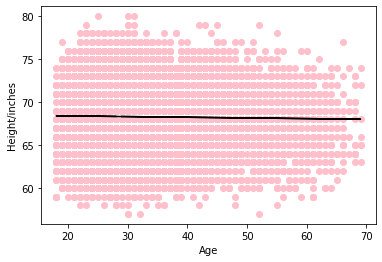

In [73]:
y_pred = linear_model.predict(X_test)
plt.scatter(X_test, y_test, color='pink')
plt.plot(X_test, y_pred, color='k')
plt.xlabel('Age')
plt.ylabel('Height/inches')